In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
df=pd.read_csv(r"C:\Users\angel\Downloads\Task 19- COVID-19 Symptoms Checker (4).csv")

In [7]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [9]:
df.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
33780,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,Italy
56416,0,0,1,0,0,0,0,1,1,1,...,0,1,0,1,0,0,0,1,0,Italy
172504,0,0,1,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,Spain
297240,0,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,Other
229674,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,UAE


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [12]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.drop(["Country"],axis=1,inplace=True)

In [14]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

<AxesSubplot:>

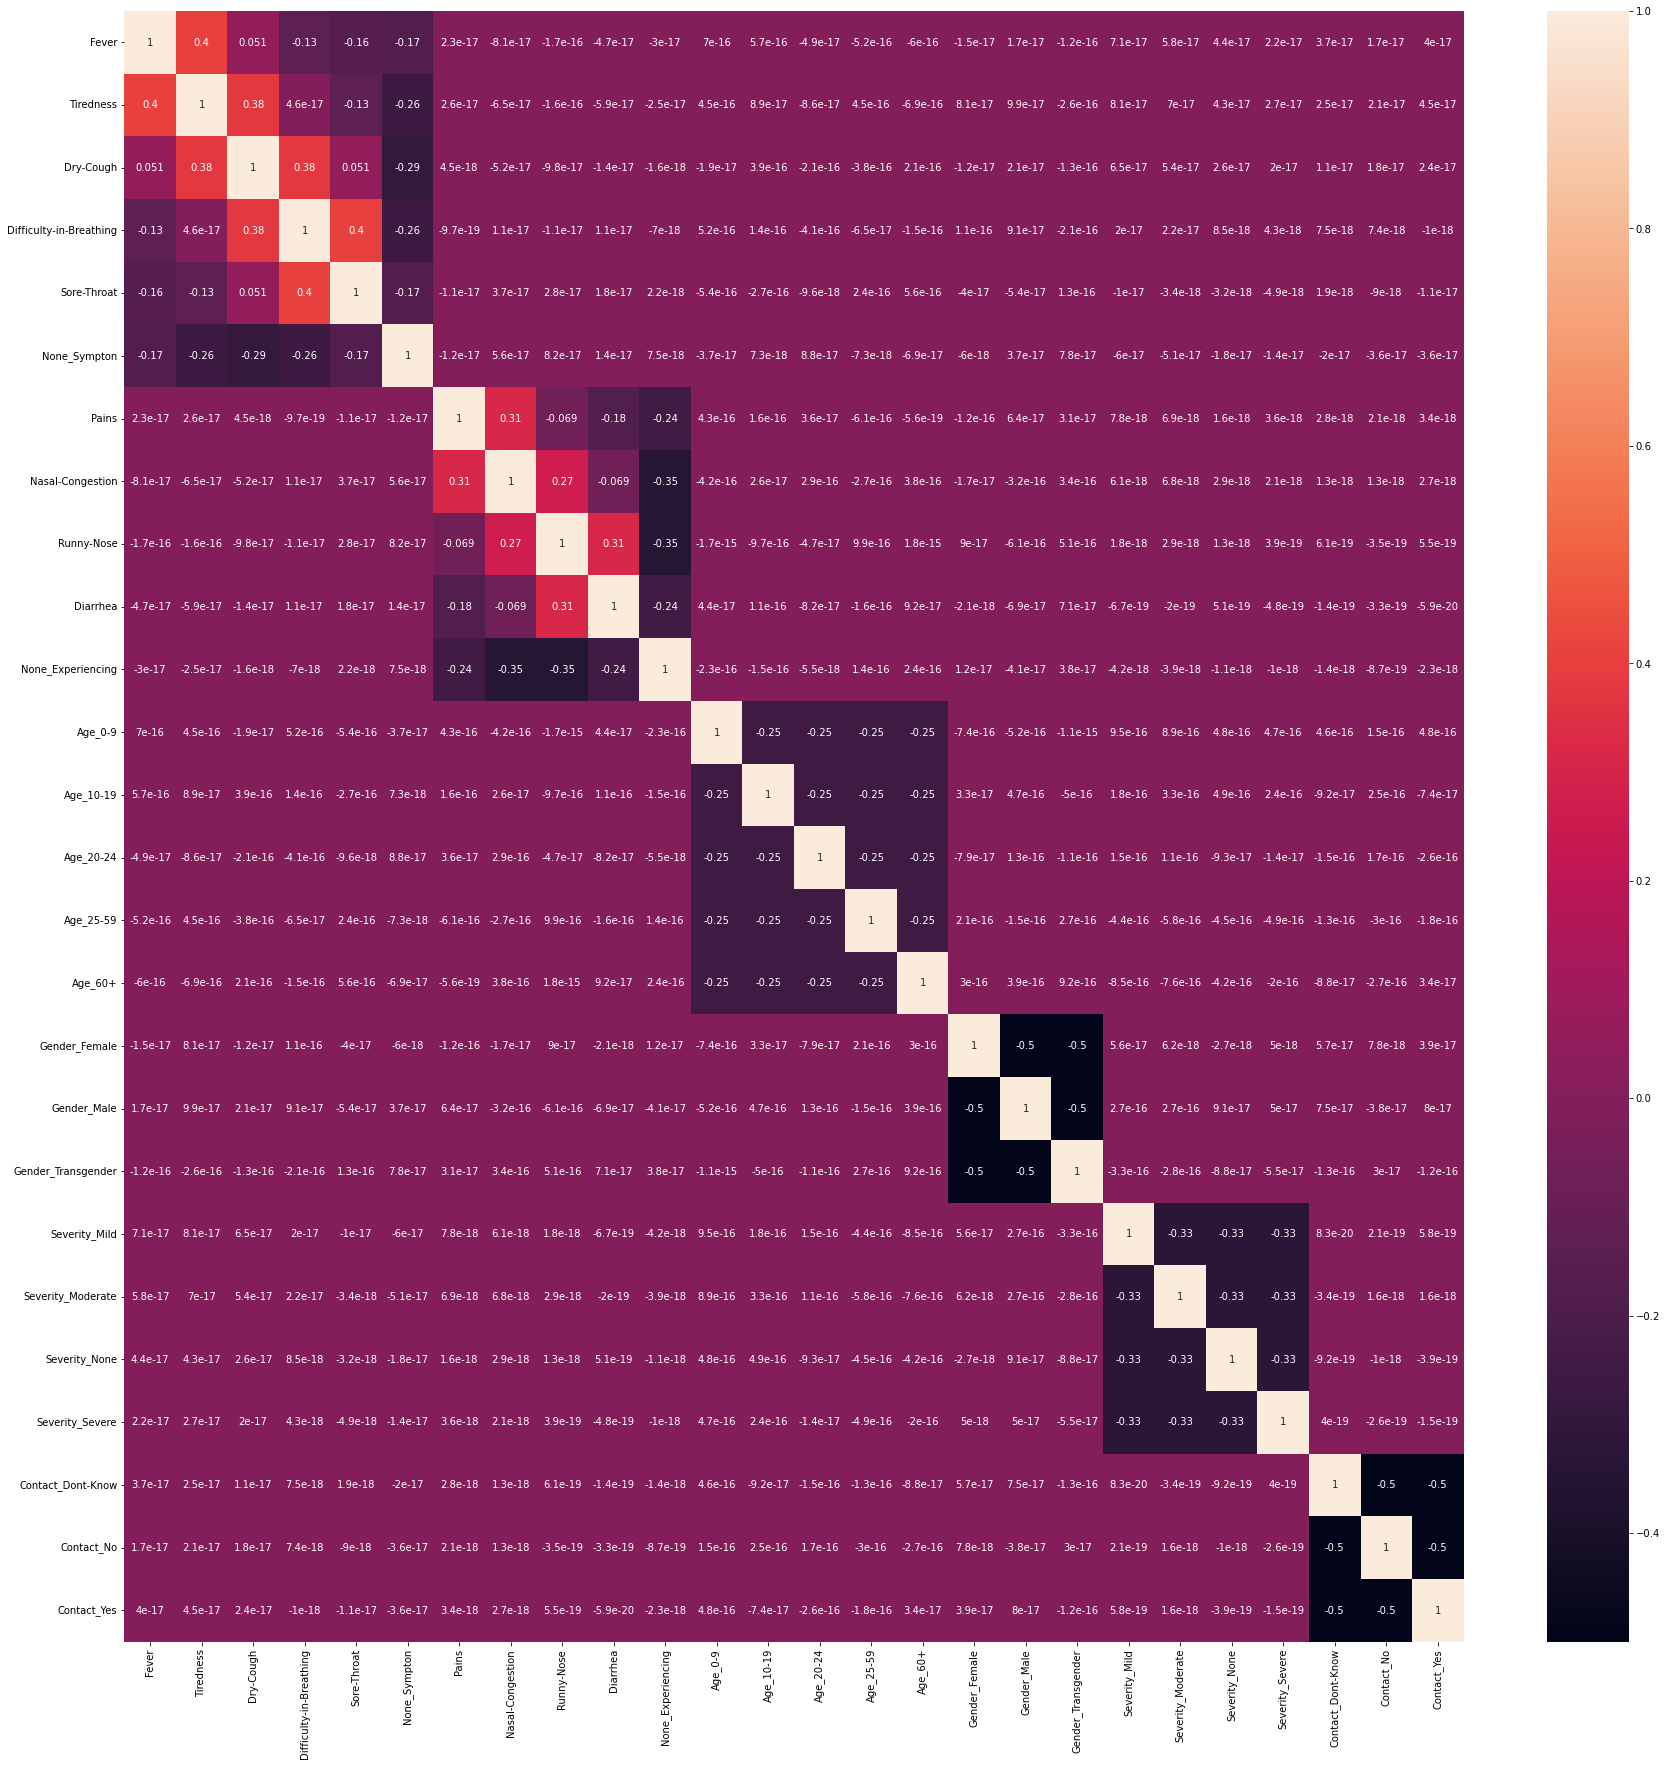

In [16]:
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Elbow Method
Used to find optimal number of clusters.

In [17]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [18]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(df_scaled)
    scores.append(corona_means.inertia_)

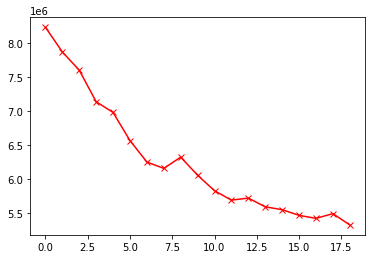

In [19]:
plt.plot(scores,"-rx")

# At point 7 ,the graph looks like a elbow. So we choose this as our K value.

# KMeans Clustering

In [20]:
corona_means=KMeans(n_clusters=7)
corona_means.fit(df_scaled)

KMeans(n_clusters=7)

In [21]:
labels=corona_means.labels_

In [22]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
df_m=pd.DataFrame(corona_means.cluster_centers_,columns=df.columns)
df_m

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.955824e-17,1.147043e-14,1.134903e-14,-3.911013e-20,-4.812836e-21,-7.397235e-17,-1.303671e-20,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,1.431564e-15,-1.289888e-14,-1.339295e-14,-2.677432e-20,-2.537252e-20,-1.850232e-17,-2.845647e-20,1.414214e+00,-7.071068e-01,-7.071068e-01
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.995299e-17,1.083983e-14,1.083748e-14,-5.144594e-20,-1.714865e-20,-7.398057e-17,-1.714865e-20,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-7.559289e-01,-1.095445e+00,-1.095445e+00,-7.559289e-01,...,2.282242e-15,-3.364845e-16,-5.516032e-16,-1.007892e-19,-3.359640e-20,-7.394768e-17,-3.359640e-20,7.401487e-17,7.401487e-17,7.401487e-17
4,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.304126e-16,-3.218960e-16,4.300096e-16,5.369232e-17,...,1.329361e-15,-2.159075e-16,2.135820e-16,-1.366752e-19,-4.555839e-20,-7.392375e-17,-4.555839e-20,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,9.208455e-15,3.124648e-15,6.107498e-15,1.023312e-20,-1.457869e-20,-1.850232e-17,-3.784851e-21,-7.071068e-01,3.535534e-01,3.535534e-01
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,2.995299e-17,1.083983e-14,1.083748e-14,-5.144594e-20,-1.714865e-20,-7.398057e-17,-1.714865e-20,7.401487e-17,7.401487e-17,7.401487e-17


# It's clear from the above table that the people at cluster 4 are not affected with corona while other clusters do affected with corona. The other clusters can also be classified. Have a close look you can find difference between the clusters.

In [27]:
df_cluster=pd.concat([df,pd.DataFrame({"Cluster":labels})],axis=1)
df_cluster.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
239692,0,1,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,5
173876,0,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1
240814,1,1,1,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,2
212226,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,2
17751,0,1,1,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,5


Principal Component Analysis (PCA)
Used to perform dimentionality reduction to have a better view of clusters of examples.

In [26]:
df_pca=PCA(n_components=3)
df_comp=df_pca.fit_transform(df_scaled)

In [28]:
df_comp=pd.DataFrame(df_comp,columns=['pca1','pca2','pca3'])
df_comp.head()

,pca1,pca2,pca3
0,2.097959,-1.813713,1.789373e-15
1,2.097959,-1.813713,1.739407e-15
2,2.097959,-1.813713,1.676526e-15
3,2.097959,-1.813713,1.803525e-15
4,2.097959,-1.813713,1.753559e-15


In [29]:
df_comp=pd.concat([df_comp,pd.DataFrame({"Cluster":labels})],axis=1)
df_comp.sample(5)

,pca1,pca2,pca3,Cluster
312527,-3.690157,0.309264,5.916175e-15,4
269593,0.316517,-1.256991,-9.219657e-01,5
247943,1.174317,0.762074,-7.175240e-15,6
196236,-1.168397,-0.247459,-1.156788e+00,0
131005,2.097959,-0.700268,1.680908e-15,0


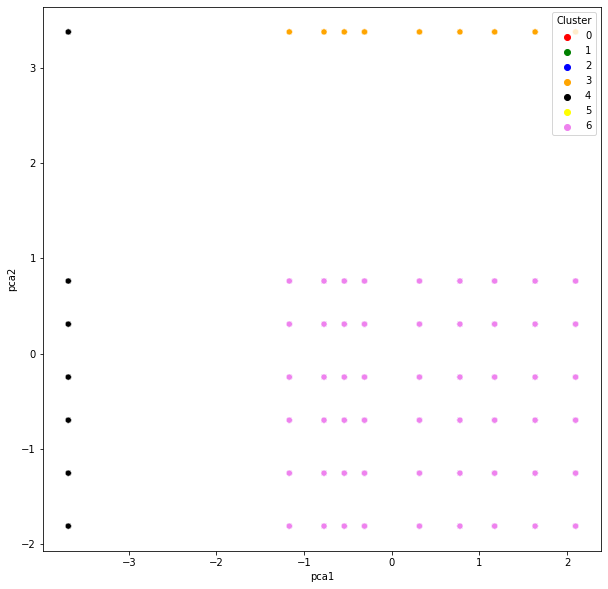

In [30]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=df_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

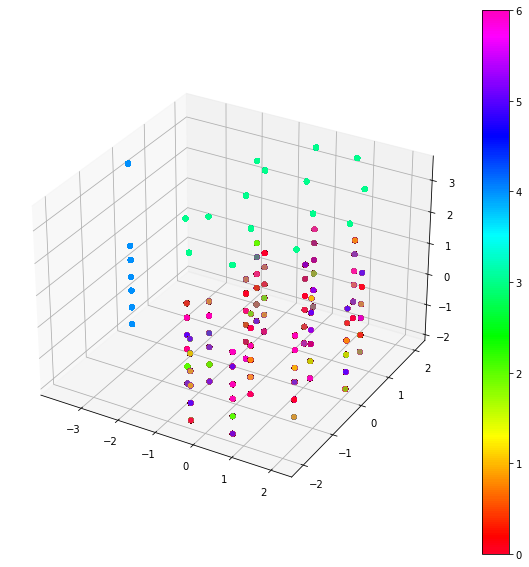

In [31]:
#Plotting the 3d-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=df_comp['pca1'],ys=df_comp['pca3'],zs=df_comp['pca2'],c=df_comp['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()